<a href="https://colab.research.google.com/github/ans90990/Assignment-8/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
235/235 [==============================] - 6s 20ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 3/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 4/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6937 - val_loss: 0.6935
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


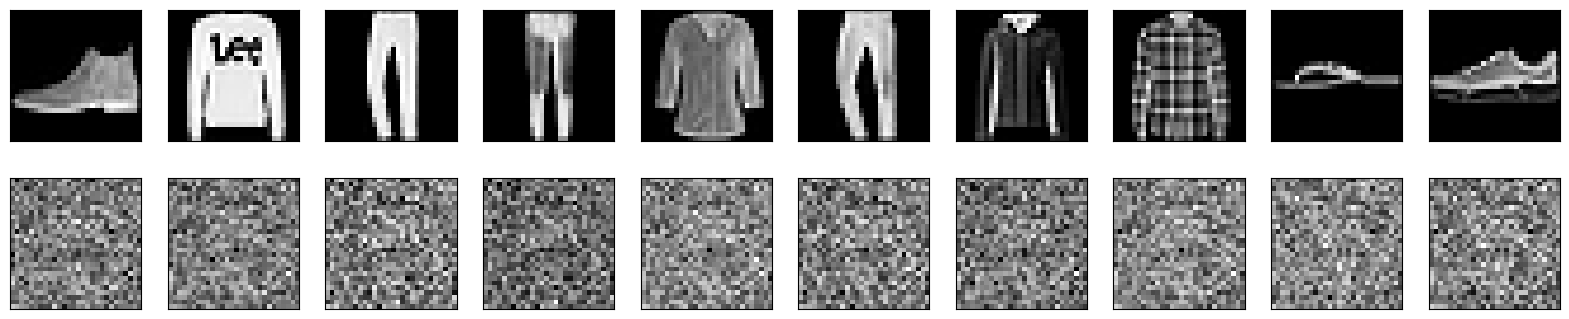

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#add one hidden layer to the autoencoder
hidden_layer = Dense(784, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

#2: predict
images = autoencoder.predict(x_test)

#3: visualise the data before reconstruction using matplotlib
import matplotlib.pyplot as plt

imDisplay = 10

plt.figure(figsize = (20,4))
for i in range(imDisplay):
  #display the original images first
  org = plt.subplot(2, imDisplay , i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  org.get_xaxis().set_visible(False)
  org.get_yaxis().set_visible(False)

  #then display the reconstructed images
  reci= plt.subplot(2, imDisplay, i + 1 + imDisplay)
  plt.imshow(images[i].reshape(28, 28))
  plt.gray()
  reci.get_xaxis().set_visible(False)
  reci.get_yaxis().set_visible(False)

plt.show()
